# Importing Data from local machine

In [3]:
import pandas as pd
df = pd.read_csv("E:\\Jupyter\\FIFA19.csv")
df.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League,Speciality
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,28,26,6,11,15,14,8,€226.5M,LALIGA SANTANDER,Complete Forward
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,31,23,7,11,15,14,11,€127.1M,SERIE A TIM,Distance Shooter
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,24,33,9,9,15,15,11,€228.1M,LIGUE 1 CONFORAMA,Complete Forward
3,3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,21,13,90,85,87,88,94,€138.6M,PREMIER LEAGUE,Goalkeeper
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,58,51,15,13,5,10,13,€196.4M,PREMIER LEAGUE,Complete Midfielder


In [10]:
df.shape

(18147, 58)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                18147 non-null  int64 
 1   Name                      18147 non-null  object
 2   Age                       18147 non-null  int64 
 3   Nationality               18147 non-null  object
 4   Overall                   18147 non-null  int64 
 5   Potential                 18147 non-null  int64 
 6   Club                      18147 non-null  object
 7   Value                     18147 non-null  object
 8   Wage                      18147 non-null  object
 9   Preferred Foot            18147 non-null  object
 10  International Reputation  18147 non-null  int64 
 11  Weak Foot                 18147 non-null  int64 
 12  Skill Moves               18147 non-null  int64 
 13  Work Rate                 18147 non-null  object
 14  Position              

# Analyze how different player attributes affect the overall rating

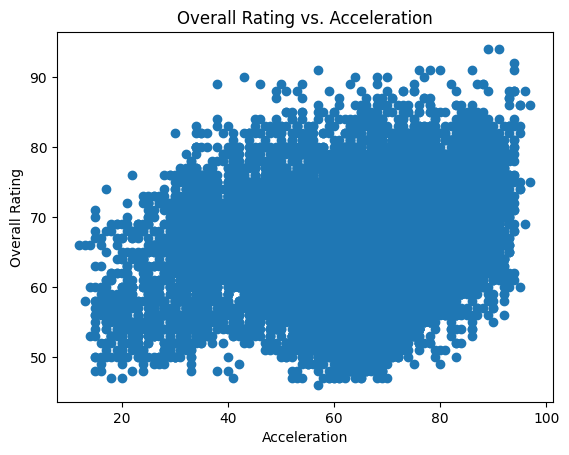

In [4]:
import matplotlib.pyplot as plt

# Scatter plot for Overall vs. Acceleration
plt.scatter(df['Acceleration'], df['Overall'])
plt.xlabel('Acceleration')
plt.ylabel('Overall Rating')
plt.title('Overall Rating vs. Acceleration')
plt.show()

# Identify players with the highest overall rating

In [5]:
# Sort players by Overall rating in descending order
top_players = df.sort_values(by='Overall', ascending=False).head(10)

# Display the top players
print(top_players[['Name', 'Overall']])

                 Name  Overall
0            L. Messi       94
1   Cristiano Ronaldo       94
2           Neymar Jr       92
3              De Gea       91
4        K. De Bruyne       91
5           E. Hazard       91
6           L. Modrić       91
7           L. Suárez       91
8        Sergio Ramos       91
12           D. Godín       90


# Determine which attributes are most important for determining the overall rating

In [8]:
from sklearn.linear_model import LinearRegression

# Define independent variables (attributes) and dependent variable (Overall rating)
X = df[['StandingTackle', 'SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes',]]  
y = df['Overall']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get coefficients (importance) of each attribute
importance = model.coef_

# Print attribute importance
for i, attr in enumerate(X.columns):
    print(f'{attr}: {importance[i]}')


StandingTackle: 0.2631473025617211
SlidingTackle: -0.16194376015018597
GKDiving: -0.015976104089387773
GKHandling: 0.003342897576430959
GKKicking: -0.037011196538994644
GKPositioning: 0.0853966617931069
GKReflexes: 0.028515824349823738
